In [1]:
pip install yelpapi

Note: you may need to restart the kernel to use updated packages.


In [2]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import pandas as pd
import numpy
import numpy as np
import seaborn as sns

from yelpapi import YelpAPI

from pprint import pprint

yelp_api = YelpAPI('e84I57zBQgZ3all0sgDoclIb7cmy09Nf2NrSn5so1fGkLnWAzGgKmrIbZ5rFOW-vkI3uszm3t9wOhD4583386I9aLarVGFeuwck2aVER63KI0Ei1qw2DxRhsD0WwX3Yx')



In [3]:
import pandas as pd

df__business_reviews = pd.DataFrame()



In [4]:
# The following zip codes for Chicago downtown area and neighborhoods.
# I Visited the following website for Chicago complete list of zip-codes for Chicago downtown.
# (https://www.seechicagorealestate.com/chicago-zip-codes-by-neighborhood.php)


chicago_downtown_zipcodes = [60601, 60602, 60603, 60604, 60605, 60606, 60607, 60608, 60610, 60611, 60612, 60616]

df__business_reviews = pd.DataFrame()

for zip_code in chicago_downtown_zipcodes:
    for x in range(2):
        response = yelp_api.search_query(categories='Restaurants+Entertainment+Nightlife', location=zip_code, sort_by='rating', limit=50, offset=x*50)
        df__business_reviews = df__business_reviews.append(pd.DataFrame(response['businesses']))
    


In [5]:
type(response)

dict

In [6]:
pprint(response)

{'businesses': [{'alias': 'conte-di-savoia-chicago',
                 'categories': [{'alias': 'delis', 'title': 'Delis'},
                                {'alias': 'italian', 'title': 'Italian'}],
                 'coordinates': {'latitude': 41.86956, 'longitude': -87.66317},
                 'display_phone': '(312) 666-3471',
                 'distance': 4048.5112856234837,
                 'id': 'J9WfLOHSTcXaT_9kz2gq0Q',
                 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/js4OeGQEKY3DHVCXf2K4bw/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '1438 W Taylor St',
                              'address2': '',
                              'address3': '',
                              'city': 'Chicago',
                              'country': 'US',
                              'display_address': ['1438 W Taylor St',
                                                  'Chicago, IL 60607'],
                              'state': 'I

                 'categories': [{'alias': 'tacos', 'title': 'Tacos'}],
                 'coordinates': {'latitude': 41.8105677770561,
                                 'longitude': -87.6652798145754},
                 'display_phone': '(773) 523-9745',
                 'distance': 5298.481781160452,
                 'id': '0n-xuWtvGYOfEBF95IaSGw',
                 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/SbCnsf2gREFFyNd2hSae_g/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '4556 S Ashland',
                              'address2': None,
                              'address3': '',
                              'city': 'Chicago',
                              'country': 'US',
                              'display_address': ['4556 S Ashland',
                                                  'Chicago, IL 60609'],
                              'state': 'IL',
                              'zip_code': '60609'},
                 'name': 

In [7]:
df__business_reviews
df__business_reviews.columns.values.tolist()

['id',
 'alias',
 'name',
 'image_url',
 'is_closed',
 'url',
 'review_count',
 'categories',
 'rating',
 'coordinates',
 'transactions',
 'location',
 'phone',
 'display_phone',
 'distance',
 'price']

In [8]:
df__business_reviews.tail()

id                                 alias  \
45  YXwVWVhmbBeVnnHJIV3mgg       jubilee-juice-and-grill-chicago   
46  6cYzBl8YfgNUv2oMaijrGQ         jims-original-hot-dog-chicago   
47  lD3qc5CidZj1yRi1p0xl6g  the-fat-shallot-food-truck-chicago-4   
48  dAtnrxod4RRg38V3_v5qbQ                kathy-des-deli-chicago   
49  kJjbElns3_GTNIklRVbHPQ                    remingtons-chicago   

                          name  \
45       Jubilee Juice & Grill   
46      Jim's Original Hot Dog   
47  The Fat Shallot Food Truck   
48             Kathy De's Deli   
49                 Remington's   

                                            image_url  is_closed  \
45  https://s3-media2.fl.yelpcdn.com/bphoto/NcbIcz...      False   
46  https://s3-media1.fl.yelpcdn.com/bphoto/otNC8Y...      False   
47  https://s3-media3.fl.yelpcdn.com/bphoto/HmX04O...      False   
48  https://s3-media3.fl.yelpcdn.com/bphoto/2GeiWQ...      False   
49  https://s3-media4.fl.yelpcdn.com/bphoto/hspjVS...      False   

                                                  url  review_count  \
45  https://www.yelp.com/biz/jubilee-juice-and-gri...           490   
46  https://www.yelp.com/biz/jims-original-hot-dog...           604   
47  https://www.yelp.com/biz/the-fat-shallot-food-...           200   
48  https://www.yelp.com/biz/kathy-des-deli-chicag...           117   
49  https://www.yelp.com/biz/remingtons-chicago?ad...           617   

                                           categories  rating  \
45  [{'alias': 'juicebars', 'title': 'Juice Bars &...     4.0   
46  [{'alias': 'hotdog', 'title': 'Hot Dogs'}, {'a...     4.0   
47  [{'alias': 'foodtrucks', 'title': 'Food Trucks...     4.5   
48  [{'alias': 'delis', 'title': 'Delis'}, {'alias...     4.5   
49  [{'alias': 'tradamerican', 'title': 'American ...     4.0   

                                          coordinates        transactions  \
45  {'latitude': 41.8840615, 'longitude': -87.6475...  [pickup, delivery]   
46   {'latitude': 41.865698, 'longitude': -87.645219}                  []   
47  {'latitude': 41.8797006295987, 'longitude': -8...            [pickup]   
48     {'latitude': 41.82774, 'longitude': -87.64026}  [pickup, delivery]   
49     {'latitude': 41.88266, 'longitude': -87.62499}          [delivery]   

                                             location         phone  \
45  {'address1': '140 N Halsted St', 'address2': '...  +13124918500   
46  {'address1': '1250 S Union Ave', 'address2': '...  +13127337820   
47  {'address1': '150 S Wacker Dr', 'address2': No...  +17738930826   
48  {'address1': '3642 S Parnell Ave', 'address2':...  +17733732688   
49  {'address1': '20 N Michigan Ave', 'address2': ...  +13127826000   

     display_phone     distance price  
45  (312) 491-8500  4508.091716    $$  
46  (312) 733-7820  2667.228928     $  
47  (773) 893-0826  3633.230411    $$  
48  (773) 373-2688  2532.640431     $  
49  (312) 782-6000  3930.963012    $$

In [9]:

df__business_reviews = df__business_reviews.reset_index(drop=True)

In [10]:
df__business_reviews.tail()

id                                 alias  \
1195  YXwVWVhmbBeVnnHJIV3mgg       jubilee-juice-and-grill-chicago   
1196  6cYzBl8YfgNUv2oMaijrGQ         jims-original-hot-dog-chicago   
1197  lD3qc5CidZj1yRi1p0xl6g  the-fat-shallot-food-truck-chicago-4   
1198  dAtnrxod4RRg38V3_v5qbQ                kathy-des-deli-chicago   
1199  kJjbElns3_GTNIklRVbHPQ                    remingtons-chicago   

                            name  \
1195       Jubilee Juice & Grill   
1196      Jim's Original Hot Dog   
1197  The Fat Shallot Food Truck   
1198             Kathy De's Deli   
1199                 Remington's   

                                              image_url  is_closed  \
1195  https://s3-media2.fl.yelpcdn.com/bphoto/NcbIcz...      False   
1196  https://s3-media1.fl.yelpcdn.com/bphoto/otNC8Y...      False   
1197  https://s3-media3.fl.yelpcdn.com/bphoto/HmX04O...      False   
1198  https://s3-media3.fl.yelpcdn.com/bphoto/2GeiWQ...      False   
1199  https://s3-media4.fl.yelpcdn.com/bphoto/hspjVS...      False   

                                                    url  review_count  \
1195  https://www.yelp.com/biz/jubilee-juice-and-gri...           490   
1196  https://www.yelp.com/biz/jims-original-hot-dog...           604   
1197  https://www.yelp.com/biz/the-fat-shallot-food-...           200   
1198  https://www.yelp.com/biz/kathy-des-deli-chicag...           117   
1199  https://www.yelp.com/biz/remingtons-chicago?ad...           617   

                                             categories  rating  \
1195  [{'alias': 'juicebars', 'title': 'Juice Bars &...     4.0   
1196  [{'alias': 'hotdog', 'title': 'Hot Dogs'}, {'a...     4.0   
1197  [{'alias': 'foodtrucks', 'title': 'Food Trucks...     4.5   
1198  [{'alias': 'delis', 'title': 'Delis'}, {'alias...     4.5   
1199  [{'alias': 'tradamerican', 'title': 'American ...     4.0   

                                            coordinates        transactions  \
1195  {'latitude': 41.8840615, 'longitude': -87.6475...  [pickup, delivery]   
1196   {'latitude': 41.865698, 'longitude': -87.645219}                  []   
1197  {'latitude': 41.8797006295987, 'longitude': -8...            [pickup]   
1198     {'latitude': 41.82774, 'longitude': -87.64026}  [pickup, delivery]   
1199     {'latitude': 41.88266, 'longitude': -87.62499}          [delivery]   

                                               location         phone  \
1195  {'address1': '140 N Halsted St', 'address2': '...  +13124918500   
1196  {'address1': '1250 S Union Ave', 'address2': '...  +13127337820   
1197  {'address1': '150 S Wacker Dr', 'address2': No...  +17738930826   
1198  {'address1': '3642 S Parnell Ave', 'address2':...  +17733732688   
1199  {'address1': '20 N Michigan Ave', 'address2': ...  +13127826000   

       display_phone     distance price  
1195  (312) 491-8500  4508.091716    $$  
1196  (312) 733-7820  2667.228928     $  
1197  (773) 893-0826  3633.230411    $$  
1198  (773) 373-2688  2532.640431     $  
1199  (312) 782-6000  3930.963012    $$

In [11]:
df__business_reviews.loc[0:len(df__business_reviews),'latitude']= np.NaN
df__business_reviews.loc[0:len(df__business_reviews),'longitude']= np.NaN

In [12]:
df__business_reviews.head()

id                               alias  \
0  AkcZ1fUyB3RocKLYGFu20Q  art-institute-of-chicago-chicago-3   
1  2DfcXGtDv7T_rnvl4lHzaQ             millennium-park-chicago   
2  5s9ntZVD45n2CxboZnLbSg              the-cloud-gate-chicago   
3  apyIymDFbUK7u-Y3V5kmkA      bavettes-bar-and-boeuf-chicago   
4  GZsrGq6H8CQ4YlGtE_Bm0Q                ciccio-mio-chicago-2   

                       name  \
0  Art Institute of Chicago   
1           Millennium Park   
2            The Cloud Gate   
3     Bavette's Bar & Boeuf   
4                Ciccio Mio   

                                           image_url  is_closed  \
0  https://s3-media2.fl.yelpcdn.com/bphoto/kp9B8B...      False   
1  https://s3-media1.fl.yelpcdn.com/bphoto/ElWdmI...      False   
2  https://s3-media1.fl.yelpcdn.com/bphoto/DIzp5M...      False   
3  https://s3-media3.fl.yelpcdn.com/bphoto/e-0zil...      False   
4  https://s3-media2.fl.yelpcdn.com/bphoto/mXb0Wh...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/art-institute-of-chic...          1866   
1  https://www.yelp.com/biz/millennium-park-chica...          1240   
2  https://www.yelp.com/biz/the-cloud-gate-chicag...           801   
3  https://www.yelp.com/biz/bavettes-bar-and-boeu...          2452   
4  https://www.yelp.com/biz/ciccio-mio-chicago-2?...           119   

                                          categories  rating  \
0  [{'alias': 'artmuseums', 'title': 'Art Museums'}]     4.5   
1             [{'alias': 'parks', 'title': 'Parks'}]     4.5   
2  [{'alias': 'landmarks', 'title': 'Landmarks & ...     4.5   
3  [{'alias': 'steak', 'title': 'Steakhouses'}, {...     4.5   
4  [{'alias': 'italian', 'title': 'Italian'}, {'a...     5.0   

                                         coordinates transactions  \
0     {'latitude': 41.8796, 'longitude': -87.623713}           []   
1   {'latitude': 41.88339, 'longitude': -87.6218446}           []   
2  {'latitude': 41.8825524, 'longitude': -87.6225...           []   
3  {'latitude': 41.8892796234574, 'longitude': -8...   [delivery]   
4     {'latitude': 41.88939, 'longitude': -87.63524}   [delivery]   

                                            location         phone  \
0  {'address1': '111 S Michigan Ave', 'address2':...  +13124433600   
1  {'address1': '201 E Randolph St', 'address2': ...  +13127421168   
2  {'address1': '201 E Randolph St', 'address2': ...  +13127421168   
3  {'address1': '218 W Kinzie St', 'address2': ''...  +13126248154   
4  {'address1': '226 W Kinzie St', 'address2': ''...                 

    display_phone     distance price  latitude  longitude  
0  (312) 443-3600   589.553507   NaN       NaN        NaN  
1  (312) 742-1168   213.138802   NaN       NaN        NaN  
2  (312) 742-1168   270.852426   NaN       NaN        NaN  
3  (312) 624-8154  1061.214517   $$$       NaN        NaN  
4                  1089.322368   $$$       NaN        NaN

In [13]:
df__business_reviews.tail()

id                                 alias  \
1195  YXwVWVhmbBeVnnHJIV3mgg       jubilee-juice-and-grill-chicago   
1196  6cYzBl8YfgNUv2oMaijrGQ         jims-original-hot-dog-chicago   
1197  lD3qc5CidZj1yRi1p0xl6g  the-fat-shallot-food-truck-chicago-4   
1198  dAtnrxod4RRg38V3_v5qbQ                kathy-des-deli-chicago   
1199  kJjbElns3_GTNIklRVbHPQ                    remingtons-chicago   

                            name  \
1195       Jubilee Juice & Grill   
1196      Jim's Original Hot Dog   
1197  The Fat Shallot Food Truck   
1198             Kathy De's Deli   
1199                 Remington's   

                                              image_url  is_closed  \
1195  https://s3-media2.fl.yelpcdn.com/bphoto/NcbIcz...      False   
1196  https://s3-media1.fl.yelpcdn.com/bphoto/otNC8Y...      False   
1197  https://s3-media3.fl.yelpcdn.com/bphoto/HmX04O...      False   
1198  https://s3-media3.fl.yelpcdn.com/bphoto/2GeiWQ...      False   
1199  https://s3-media4.fl.yelpcdn.com/bphoto/hspjVS...      False   

                                                    url  review_count  \
1195  https://www.yelp.com/biz/jubilee-juice-and-gri...           490   
1196  https://www.yelp.com/biz/jims-original-hot-dog...           604   
1197  https://www.yelp.com/biz/the-fat-shallot-food-...           200   
1198  https://www.yelp.com/biz/kathy-des-deli-chicag...           117   
1199  https://www.yelp.com/biz/remingtons-chicago?ad...           617   

                                             categories  rating  \
1195  [{'alias': 'juicebars', 'title': 'Juice Bars &...     4.0   
1196  [{'alias': 'hotdog', 'title': 'Hot Dogs'}, {'a...     4.0   
1197  [{'alias': 'foodtrucks', 'title': 'Food Trucks...     4.5   
1198  [{'alias': 'delis', 'title': 'Delis'}, {'alias...     4.5   
1199  [{'alias': 'tradamerican', 'title': 'American ...     4.0   

                                            coordinates        transactions  \
1195  {'latitude': 41.8840615, 'longitude': -87.6475...  [pickup, delivery]   
1196   {'latitude': 41.865698, 'longitude': -87.645219}                  []   
1197  {'latitude': 41.8797006295987, 'longitude': -8...            [pickup]   
1198     {'latitude': 41.82774, 'longitude': -87.64026}  [pickup, delivery]   
1199     {'latitude': 41.88266, 'longitude': -87.62499}          [delivery]   

                                               location         phone  \
1195  {'address1': '140 N Halsted St', 'address2': '...  +13124918500   
1196  {'address1': '1250 S Union Ave', 'address2': '...  +13127337820   
1197  {'address1': '150 S Wacker Dr', 'address2': No...  +17738930826   
1198  {'address1': '3642 S Parnell Ave', 'address2':...  +17733732688   
1199  {'address1': '20 N Michigan Ave', 'address2': ...  +13127826000   

       display_phone     distance price  latitude  longitude  
1195  (312) 491-8500  4508.091716    $$       NaN        NaN  
1196  (312) 733-7820  2667.228928     $       NaN        NaN  
1197  (773) 893-0826  3633.230411    $$       NaN        NaN  
1198  (773) 373-2688  2532.640431     $       NaN        NaN  
1199  (312) 782-6000  3930.963012    $$       NaN        NaN

In [14]:
df__business_reviews.describe()

review_count       rating      distance  latitude  longitude
count   1200.000000  1200.000000   1200.000000       0.0        0.0
mean     696.250833     4.354167   1824.742469       NaN        NaN
std     1155.505886     0.328617   2331.035730       NaN        NaN
min       19.000000     3.500000     51.617025       NaN        NaN
25%      131.250000     4.000000    633.322129       NaN        NaN
50%      322.000000     4.500000   1140.688258       NaN        NaN
75%      739.000000     4.500000   2195.232337       NaN        NaN
max     8742.000000     5.000000  50524.596673       NaN        NaN

In [15]:
for i in range(0, len(df__business_reviews)):
    if df__business_reviews.iloc[i]['coordinates']:
        for coordinate_name, coordinate_value in df__business_reviews.iloc[i]['coordinates'].items():
            df__business_reviews.loc[i, coordinate_name]=coordinate_value, 

In [16]:
df__business_reviews[:1]

id                               alias  \
0  AkcZ1fUyB3RocKLYGFu20Q  art-institute-of-chicago-chicago-3   

                       name  \
0  Art Institute of Chicago   

                                           image_url  is_closed  \
0  https://s3-media2.fl.yelpcdn.com/bphoto/kp9B8B...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/art-institute-of-chic...          1866   

                                          categories  rating  \
0  [{'alias': 'artmuseums', 'title': 'Art Museums'}]     4.5   

                                      coordinates transactions  \
0  {'latitude': 41.8796, 'longitude': -87.623713}           []   

                                            location         phone  \
0  {'address1': '111 S Michigan Ave', 'address2':...  +13124433600   

    display_phone    distance price  latitude  longitude  
0  (312) 443-3600  589.553507   NaN   41.8796 -87.623713

In [17]:
df__business_reviews.name.value_counts()

Brightwok Kitchen            13
Cafecito                     11
Intelligentsia Coffee        10
HERO Coffee Bar              10
Alfred Caldwell Lily Pool    10
                             ..
Dash of Salt and Pepper       1
My Chicago Golf               1
Original Ferrara Bakery       1
IDOF Fresh Mediterranean      1
The Corner Farmacy            1
Name: name, Length: 523, dtype: int64

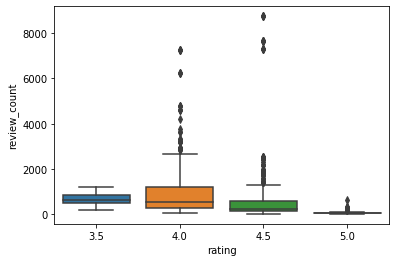

In [18]:
sns.boxplot(x='rating',y='review_count',data=df__business_reviews)

In [25]:

 
CHICAGO_COORDINATES = (41.8781, -87.6298)

 
# for debugging and unit testing purposes 
MAX_RECORDS = 1000
  
# create map centered/zoomed on Chicago downtown
map = folium.Map(location=CHICAGO_COORDINATES, zoom_start=15)

marker_cluster = MarkerCluster().add_to(map)
 
# add a marker for every reviewed business 
for index, row in df__business_reviews[0:MAX_RECORDS].iterrows():
    print(row["name"], row["latitude"], row["longitude"], row['location'])
    if not(numpy.isnan(row["latitude"]))  and   not(numpy.isnan(row["longitude"])) :
        if  row['rating'] > 3.5 :
            folium.Marker(location=(row["latitude"],row["longitude"]),popup=folium.Popup(html="Name: %s <br> <br> Location: %s <br> <br> Rating: %s" %(row["name"], row['location'],row['rating']), max_width=450),icon=folium.Icon(color='green', icon='ok-sign'),).add_to(marker_cluster)
        else:
            folium.Marker(location=(row["latitude"],row["longitude"]),popup=folium.Popup(html="Name: %s <br> <br> Location: %s <br> <br> Rating: %s" %(row["name"], row['location'],row['rating']), max_width=450),icon=folium.Icon(color='red', icon='ok-sign'),).add_to(marker_cluster)

       
        


Art Institute of Chicago 41.8796 -87.623713 {'address1': '111 S Michigan Ave', 'address2': '', 'address3': '', 'city': 'Chicago', 'zip_code': '60603', 'country': 'US', 'state': 'IL', 'display_address': ['111 S Michigan Ave', 'Chicago, IL 60603']}
Millennium Park 41.88339 -87.6218446 {'address1': '201 E Randolph St', 'address2': '', 'address3': '', 'city': 'Chicago', 'zip_code': '60602', 'country': 'US', 'state': 'IL', 'display_address': ['201 E Randolph St', 'Chicago, IL 60602']}
The Cloud Gate 41.8825524 -87.6225514 {'address1': '201 E Randolph St', 'address2': '', 'address3': '', 'city': 'Chicago', 'zip_code': '60602', 'country': 'US', 'state': 'IL', 'display_address': ['201 E Randolph St', 'Chicago, IL 60602']}
Bavette's Bar & Boeuf 41.8892796234574 -87.6348227262497 {'address1': '218 W Kinzie St', 'address2': '', 'address3': '', 'city': 'Chicago', 'zip_code': '60654', 'country': 'US', 'state': 'IL', 'display_address': ['218 W Kinzie St', 'Chicago, IL 60654']}
Ciccio Mio 41.88939 -8

Printers Row Wine Shop 41.8729073 -87.6289537 {'address1': '719 S Dearborn St', 'address2': '', 'address3': '', 'city': 'Chicago', 'zip_code': '60605', 'country': 'US', 'state': 'IL', 'display_address': ['719 S Dearborn St', 'Chicago, IL 60605']}
Mercat a la Planxa 41.8732738 -87.6244472 {'address1': '638 S Michigan Ave', 'address2': '', 'address3': '', 'city': 'Chicago', 'zip_code': '60605', 'country': 'US', 'state': 'IL', 'display_address': ['638 S Michigan Ave', 'Chicago, IL 60605']}
Open House Chicago 41.878597 -87.6249 {'address1': '224 S Michigan Ave', 'address2': '', 'address3': '', 'city': 'Chicago', 'zip_code': '60604', 'country': 'US', 'state': 'IL', 'display_address': ['224 S Michigan Ave', 'Chicago, IL 60604']}
Sofi Restaurant 41.8738179 -87.6292004 {'address1': '616 S Dearborn St', 'address2': '', 'address3': '', 'city': 'Chicago', 'zip_code': '60605', 'country': 'US', 'state': 'IL', 'display_address': ['616 S Dearborn St', 'Chicago, IL 60605']}
The Modern Wing - Art Insti

HERO Coffee Bar 41.8758857 -87.62904 {'address1': '439 S Dearborn St', 'address2': '', 'address3': '', 'city': 'Chicago', 'zip_code': '60605', 'country': 'US', 'state': 'IL', 'display_address': ['439 S Dearborn St', 'Chicago, IL 60605']}
Polombia 41.874585 -87.6404069 {'address1': '520 W Harrison St', 'address2': None, 'address3': '', 'city': 'Chicago', 'zip_code': '60607', 'country': 'US', 'state': 'IL', 'display_address': ['520 W Harrison St', 'Chicago, IL 60607']}
Ocean Prime 41.8879449 -87.6253366 {'address1': '87 E Wacker Dr', 'address2': '', 'address3': None, 'city': 'Chicago', 'zip_code': '60601', 'country': 'US', 'state': 'IL', 'display_address': ['87 E Wacker Dr', 'Chicago, IL 60601']}
Roka Akor - Chicago 41.8903716 -87.6312552 {'address1': '456 N Clark St', 'address2': '', 'address3': '', 'city': 'Chicago', 'zip_code': '60654', 'country': 'US', 'state': 'IL', 'display_address': ['456 N Clark St', 'Chicago, IL 60654']}
Forno Rosso Pizzeria Napoletana 41.8845699 -87.65406 {'add

Eataly Chicago 41.892335432963 -87.6262607945148 {'address1': '43 E Ohio St', 'address2': '', 'address3': '', 'city': 'Chicago', 'zip_code': '60611', 'country': 'US', 'state': 'IL', 'display_address': ['43 E Ohio St', 'Chicago, IL 60611']}
Travelle at The Langham, Chicago 41.88860197354319 -87.62741176090235 {'address1': '330 N Wabash Ave', 'address2': '', 'address3': '', 'city': 'Chicago', 'zip_code': '60611', 'country': 'US', 'state': 'IL', 'display_address': ['330 N Wabash Ave', 'Chicago, IL 60611']}
NoMI Kitchen 41.896899 -87.625319 {'address1': '800 N Michigan Ave', 'address2': 'Fl 7', 'address3': 'Park Hyatt Chicago', 'city': 'Chicago', 'zip_code': '60611', 'country': 'US', 'state': 'IL', 'display_address': ['800 N Michigan Ave', 'Fl 7', 'Park Hyatt Chicago', 'Chicago, IL 60611']}
Tribune Tower 41.890383 -87.623674 {'address1': '435 N Michigan Ave', 'address2': '', 'address3': '', 'city': 'Chicago', 'zip_code': '60611', 'country': 'US', 'state': 'IL', 'display_address': ['435 N M

In [26]:
# Show the map with the marker clusters

map